# Visualizing NN Training

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import model
import dataset.iris_data as iris_data

In [3]:
# Load iris dataset
train, test = iris_data.load_data()
num_train = train[0].shape[0]
train_x, train_y = train

In [4]:
# Define learning problem
iris = model.LearningProblem(input_dim=4, num_classes=3, train=train, test=test, path="./tmp/")

In [ ]:
# Generate learning models            
#  [4 dim input] ==> [2 dim hidden] ==> [n dim hidden] ==> [3 dim output]
n_dim = [4,4,4,4,4,4,4,4,4,4]
for i in range(len(n_dim)):
    iris.load_model("four_{}".format(i), hidden_dims=[2,i])

In [ ]:
loss_curves = dict()
names = ['four_{}'.format(i) for i in range(len(n_dim))]
with model.Session(iris) as sess:
    for m in names:
        sess.set_current_model(m)
        loss_curves[m] = sess.quick_train(epochs=50000)

In [ ]:
# Plot loss curves
for m in names:
    plt.plot(loss_curves[m])
plt.legend(names)
plt.xlim((0,50000))
plt.ylim((0,1.5))
plt.title('Loss curves for different NN architectures continued')
plt.savefig('loss_curves.png',dpi=200)
plt.show()

In [5]:
iris.load_model("validate_2", hidden_dims=[2,4])

In [6]:
with model.Session(iris) as sess:
    sess.set_current_model("validate_2")
    loss_curve, loss_curve_v = sess.quick_train(epochs=1000000, validate=True)

Initializing variables for validate_2.


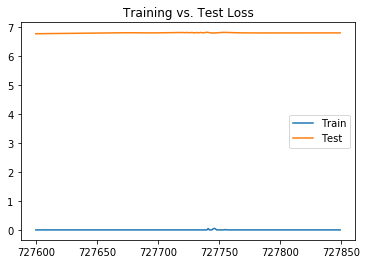

In [24]:
plt.plot(loss_curve['loss'][727600:727850])
plt.plot(loss_curve_v['loss_test'][727600:727850])
plt.legend(["Train","Test"])
plt.title('Training vs. Test Loss')
plt.savefig('validation_super_long_zoom_6.png',dpi=600)
plt.show()